### CSE-221710302060-Shaik Shoaib Aslam

In [20]:
#Importing required libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv')
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [22]:
# Creating user defined function to impute missing values
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace = True)
    return col

df.apply(lambda col: fill_na(col))
df.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

## Question 1

### Apply the KNN Algorithm on the dataset .


In [23]:
#Splitting data into input and output
X = df.drop(['CASENUM','ATTORNEY'],axis = 1)
y = df.ATTORNEY

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

In [25]:
# Applying Scaling on training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling for train data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
# Scaling for test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
## Fitting scaled model on knn and generating list of accuracy scores 
# Cheking for optimum k-value
from sklearn.metrics import accuracy_score,classification_report
scores = []
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k,metric='euclidean') 
    knn_model.fit(scaled_X_train,y_train)        
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.5970149253731343,
 0.5783582089552238,
 0.6082089552238806,
 0.6343283582089553,
 0.6492537313432836,
 0.6567164179104478,
 0.6567164179104478,
 0.6492537313432836,
 0.664179104477612,
 0.6716417910447762,
 0.664179104477612,
 0.6529850746268657,
 0.6567164179104478,
 0.6305970149253731,
 0.6305970149253731,
 0.6492537313432836,
 0.6343283582089553,
 0.6417910447761194,
 0.6492537313432836]

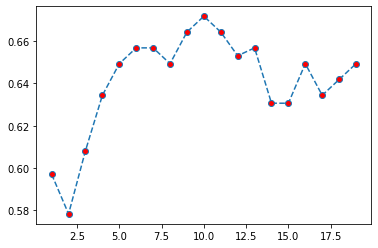

In [27]:
# Plotting k values and scores
plt.plot(range(1,20),scores,'--',marker = 'o',markerfacecolor = 'red')

#### Observations :
    From the graph Optimum k value can be 10

In [28]:
# Optimum k value is 10
final_model = KNeighborsClassifier(n_neighbors=11,metric = 'euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

## Question 2

### Compute all the classification metrics

####  Classification report for train data

In [29]:
final_train_pred = final_model.predict(scaled_X_train)
# Classification report for train data
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       557
           1       0.71      0.73      0.72       515

    accuracy                           0.73      1072
   macro avg       0.73      0.73      0.73      1072
weighted avg       0.73      0.73      0.73      1072



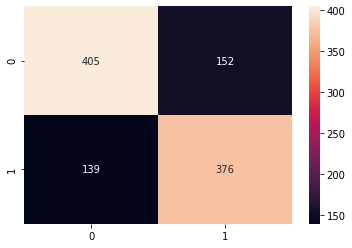

In [54]:
# Confusion matrix for train data
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot = True,fmt = 'd')

#### Observations : 
    Accuracy is 73% on training data using KNeighborsClassifier

#### Classification report for test data

In [55]:
final_test_pred = final_model.predict(scaled_X_test)
# Classification report for test data
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       128
           1       0.68      0.67      0.68       140

    accuracy                           0.66       268
   macro avg       0.66      0.66      0.66       268
weighted avg       0.66      0.66      0.66       268



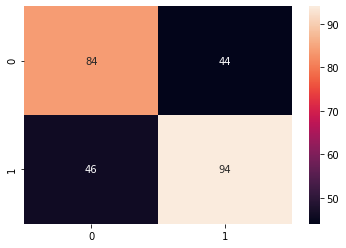

In [56]:
# Confusion matrix for test data
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot = True,fmt = 'd')

#### Obxervations :
    Accuracy is 66% on test data using KNeighborsClassifier

## Question 3

### Plot the ROC Curve for the model and find the AUC

In [32]:
# for ROC Curve
# Finding Area under curve(AUC)
# TPR,FPR,Threshold
from sklearn.metrics import roc_auc_score,roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,m_prob,pos_label = 1)

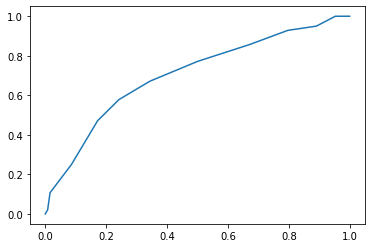

In [33]:
plt.plot(fpr,tpr)

In [34]:
# Area under Curve
roc_auc_score(y_test,m_prob)

0.7046875

## Question 4

### Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC

#### Using Logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
y1_train_pred = reg.predict(X_train) # prediction on training data
y_test_pred = reg.predict(X_test) # Prediction on testing data

In [69]:
# Classification report for training data
print(classification_report(y_train,y1_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       557
           1       0.67      0.77      0.72       515

    accuracy                           0.71      1072
   macro avg       0.72      0.71      0.71      1072
weighted avg       0.72      0.71      0.71      1072



In [70]:
# Classification report for testing data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       128
           1       0.65      0.76      0.70       140

    accuracy                           0.66       268
   macro avg       0.66      0.65      0.65       268
weighted avg       0.66      0.66      0.65       268



#### Finding ROC Curve for Logistic regression model

In [71]:
#ROC Curve
# TPR,FPR,Threshold
from sklearn.metrics import roc_auc_score,roc_curve
m_prob1 = reg.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,m_prob1,pos_label = 1)

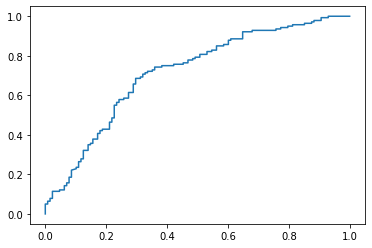

In [72]:
plt.plot(fpr,tpr)

In [73]:
roc_auc_score(y_test,m_prob1)

0.7151785714285714

#### Observations :
    The AUC for Logistic Regression model is more than KNeighborsClassifier model
    i.e., for Logisitic Regression it is 71% and for KNeighborsClassifier it is 70%